# **Configurando as bibliotecas do projeto**

## *Instalação de bibliotecas*

In [3]:
!pip install Ta-Lib

Defaulting to user installation because normal site-packages is not writeable


## *Importação de bibliotecas*

In [4]:
'''
    Essa célula será usada para a importação de bibliotecas.
'''

# Instala a biblioteca que será utilizada para se obter os dados financeiros.
import yfinance as yf
# Importa a biblioteca que será utilizada para a manipulação de DataFrames.
import pandas as pd
# Importa a biblioteca que será utilizada para lidar com objetos do tipo "datetime".
from datetime import datetime, timedelta
# Importa a biblioteca que será responsável pela tipagem de funções.
from typing import Union, Optional
# Importa a biblioteca que será utilizada para a manipulação de arrays e também para o uso de algumas funções matemáticas.
import numpy as np
# Importa a biblioteca que será utilizada para calcular métricas de análise técnica.
import talib
# Importa o módulo que será utilizado para escalar as features do DataFrame final.
from sklearn.preprocessing import MinMaxScaler
# Importa o módulo que será utilizado para dividir o DataFrame final em treino e teste.
from sklearn.model_selection import train_test_split

# **Data Engineering**

### *Configurações iniciais*

In [5]:
'''
    Essa célula será usada para se obter os tickets das companhias que fazem parte do S&P 500, com base em dados da wikipedia.
'''

# Salva em uma variável a url que contém a tabela com os tickets das companhias.
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Lê todas as tabelas presentes na url acima.
sp500_table = pd.read_html(url)

# Salva a coluna "Symbol" da primeira tabela em uma variável (tal coluna contém todos os tickets das companhias que fazem parte do S&P 500).
sp500_tickets = sp500_table[0]['Symbol']

# Transforma os tickets obtidos em uma lista.
sp500_tickets = sp500_tickets.tolist()

# Exibe a lista de tickets criada acima.
sp500_tickets

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'

In [6]:
'''
    Essa célula será usada para definir o intervalo de tempo dos dados que serão coletados, especificando a data de início e a data de fim.
'''

# Define a data inicial cujos dados serão coletados.
start_date = datetime(2019,1,2).date()
# Define a data final cujos dados serão coletados.
end_date = datetime(2023,12,30).date()

In [7]:
'''
    Essa célula será usada para criar um dicionário chamado setup, que contém os parâmetros principais para a coleta de dados, 
    incluindo a lista de tickers das companhias do S&P 500 e o intervalo de tempo.
'''

# Cria um dicionário para guardar alguns parâmetros importantes para a coleta de dados.
setup = {
    "tickers": sp500_tickets,
    "start_date": start_date,
    "end_date": end_date,
    # Número de tickers com maior "V Value" que serão utilizados no treinamento do modelo LSTM.
    "tickers_to_select": 50
}

### *Obtendo dados dos tickers via yfinance (Open, High, Low, Close, Adj Close, Volume)*

In [8]:
'''
    Essa célula será usada para a obtenção de alguns dados (Open, High, Low, Close, Adj Close, Volume) 
    dos tickers presentes na variável de configuração setup.
'''

# Cria um array que guardará os DataFrames que contém os dados referentes a cada um dos tickers presentes na variável de configuração setup.
data_array = np.empty(len(setup['tickers']), dtype=object)

# Itera sobre cada um dos tickers presentes na variável de configuração setup.
for i, ticker in enumerate(setup['tickers']):
    # Faz o download dos dados do ticker em questão
    ticker_data = yf.download(ticker, setup['start_date'], setup['end_date'])
    # Adiciona um nome ao DataFrame do ticker em questão.
    ticker_data.name=ticker
    # Salva o DataFrame do ticker em questão na variável "data_array".
    data_array[i] = ticker_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

$BF.B: possibly delisted; No price data found  (1d 2019-01-02 -> 2023-12-30)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

### *Filtrando os dados obtidos*

In [9]:
'''
    Essa célula será responsável por filtrar a variável "data_array" de modo que esta só contenha DataFrames não vazios.
'''

# Cria um filtro para identificar quais DataFrames presentes em "data_array" são vazios, isto é, não possuem nenhum índice.
void_filter = np.array([df.index.empty for df in data_array])

# Aplica a negação do filtro gerado acima (ou seja, filtra os DataFrames que não são vazios) no array "data_array" e armazena o resultado 
# na variável "filtered_data_array". 
filtered_data_array = data_array[~void_filter]

# Exibe uma mensagem que informa quantos tickers foram removidos na filtragem realizada acima.
print(f"Foram removidos {len(data_array) - len(filtered_data_array)} tickers que estavam vazios.")

Foram removidos 5 tickers que estavam vazios.


In [10]:
'''
    Essa célula será responsável por filtrar a variável "data_array" de modo que esta só contenha DataFrames cujos índices se iniciem em 
    setup['start_date'].
'''

# Armazena o tamanho atual do array "filtered_data_array" para que se tenha ideia ao final dessa célula, de quantos tickers 
# foram removidos com o filtro que será aplicado aqui.
filtered_data_array_initial_len = len(filtered_data_array)

# Cria um filtro para saber quais dos DataFrames presentes em "filtered_data_array" possuem datas iniciais (isto é, índices de posição 0) 
# iguais à "setup['start_date']".
start_date_filter = [df.index[0].date() == setup['start_date'] for df in filtered_data_array]

# Aplica o filtro criado acima, removendo assim todos os DataFrames presentes em "filtered_data_array" cujos índices iniciais são diferentes de 
# "setup['start_date']".
filtered_data_array = filtered_data_array[start_date_filter]

# Exibe uma mensagem informando quantos DataFrames não satisfaziam a condição do filtro criado acima, e informando também quantos DataFrames
# ainda existem em "data_array".
print(f"Foram removidos {filtered_data_array_initial_len - len(filtered_data_array)} tickers que não possuiam data inicial igual à {setup['start_date']}. Agora, todos os demais {len(filtered_data_array)} tickers \npossuem data de inicio em {setup['start_date']}.")

Foram removidos 13 tickers que não possuiam data inicial igual à 2019-01-02. Agora, todos os demais 485 tickers 
possuem data de inicio em 2019-01-02.


In [11]:
'''
    Essa célula será utilizada para mostrar que, nos dados baixados, não existem DataFrames em "data_array" cujos índices terminam em uma 
    data anterior à última data de negociação possível antes de setup['end_date'], isto é não existem DataFrames em "data_array" cujos índices
    terminam em uma data anterior à 2023-12-29.
'''

# Obtem qual é o menor dentre os últimos índices de cada um dos DataFrames presentes em "filtered_data_array"
lowest_last_date = np.min(np.array([df.index[len(df.index)-1] for df in filtered_data_array]))

# Exibe uma mensagem que informa qual é a menor data final entre todos os DataFrames presentes em "filtered_data_array" e gera uma
# conclusão a partir de tal data.
print(f"Dentre os tickers que passaram nos filtros acima, a menor data final é {lowest_last_date.date()}, que é a última data possível de negociação dentro do \nperiodo estabelecido na variável 'setup' ({setup['end_date']}). Ou seja, nenhum filtro precisa ser aplicado em relação a data final dos tickers.")

Dentre os tickers que passaram nos filtros acima, a menor data final é 2023-12-29, que é a última data possível de negociação dentro do 
periodo estabelecido na variável 'setup' (2023-12-30). Ou seja, nenhum filtro precisa ser aplicado em relação a data final dos tickers.


In [12]:
'''
    Essa célula verifica se algum dos DataFrames presentes em "filtered_data_array" possui valores nulos.
'''

# Cria uma lista auxiliar que conterá valores booleanos em todas as suas posições. Sendo que, para qualquer posição "i" dessa lista, 
# se tal posição contiver o valor True, indica que o DataFrame que ocupa essa mesma posição "i" na variável "filtered_data_array" 
# possui valores nulos. Caso contrário, indica que o DataFrame que ocupa tal posição em "filtered_data_array" não possui valores nulos.
aux_list = [df.isnull().values.any() for df in filtered_data_array]

# Exibe mensagens indicando se existem ou não DataFrames com valores nulos na variável "filtered_data_array".
if True in aux_list: 
    print("Existem DataFrames em 'filtered_data_array' que possuem valores nulos.")
else: 
    print("Não existem DataFrames em 'filtered_data_array' que possuam valores nulos.")

Não existem DataFrames em 'filtered_data_array' que possuam valores nulos.


In [13]:
'''
    Essa célula verifica se todos os DataFrames presentes em "filtered_data_array" possuem os mesmos índices.
'''

# Vamos tomar como referência os índices do DataFrame que ocupa a posição 0 da variável "filtered_data_array".
reference_indexes = filtered_data_array[0].index

# Verifica se todos os DataFrames presentes em "filtered_data_array" possuem os mesmos índices.
areAllIndexesEquals = all(df.index.equals(reference_indexes) for df in filtered_data_array)

if areAllIndexesEquals:
    print("Todos os DataFrames presentes em 'filtered_data_array' possuem os mesmos índices.")
else:
    print("Existem DataFrames presentes em 'filtered_data_array' que possuem índices distintos.")

Todos os DataFrames presentes em 'filtered_data_array' possuem os mesmos índices.


# **Feature Engineering**

#### *Gerando os retornos aritméticos diários dos tickers*

In [14]:
def get_ticker_daily_arithmetic_returns(daily_adjusted_closing_prices: pd.Series) -> pd.Series:
    '''
        Description:
            Essa função calcula e retorna a série temporal dos retornos aritméticos diários de um certo ticker.
        Args:
            daily_adjusted_closing_prices (pd.Series): Série temporal dos preços de fechamento diários ajustados do ticker em questão.
        Return:
            ticker_daily_arithmetic_returns (pd.Series): Série temporal dos retornos aritméticos diários do ticker em questão.
        Errors:
            TypeError: É esperado que o parâmetro "daily_adjusted_closing_prices" seja um objeto do tipo pd.Series.
            ValueError: É esperado que a série temporal "daily_adjusted_closing_prices" contenha apenas números.
    '''

    # Caso o parâmetro 'daily_adjusted_closing_prices' não seja um objeto do tipo pd.Series, um erro é retornado.
    if not isinstance(daily_adjusted_closing_prices, pd.Series):
        raise TypeError("É esperado que o parâmetro 'daily_adjusted_closing_prices' seja um objeto do tipo pd.Series.")

    # Caso a série temporal 'daily_adjusted_closing_prices' não seja numérica, um erro é retornado.
    if not(pd.api.types.is_numeric_dtype(daily_adjusted_closing_prices)):
        raise ValueError("É esperado que a série temporal 'daily_adjusted_closing_prices' contenha apenas números.")
    
    # Cria uma série temporal contendo os retornos diários do ticker em questão.
    ticker_daily_arithmetic_returns = daily_adjusted_closing_prices.pct_change()

    # Como não é possível calcular o retorno diário do "dia 0", removeremos a primeira linha da série temporal gerada acima.
    ticker_daily_arithmetic_returns = ticker_daily_arithmetic_returns[1:]
    
    # Retorna a série temporal resultante.
    return ticker_daily_arithmetic_returns

#### *Gerando os retornos logarítmicos diários dos tickers*

In [15]:
def get_ticker_daily_logarithmic_returns(daily_adjusted_closing_prices: pd.Series) -> pd.Series:
    '''
        Description:
            Essa função calcula e retorna a série temporal dos retornos logarítmicos diários de um certo ticker.
        Args:
            daily_adjusted_closing_prices (pd.Series): Série temporal dos preços de fechamento diários ajustados do ticker em questão.
        Return:
            ticker_daily_arithmetic_returns (pd.Series): Série temporal dos retornos logarítmicos diários do ticker em questão.
        Errors:
            TypeError: É esperado que o parâmetro "daily_adjusted_closing_prices" seja um objeto do tipo pd.Series.
            ValueError: É esperado que a série temporal "daily_adjusted_closing_prices" contenha apenas números.
    '''

    # Caso o parâmetro 'daily_adjusted_closing_prices' não seja um objeto do tipo pd.Series, um erro é retornado.
    if not isinstance(daily_adjusted_closing_prices, pd.Series):
        raise TypeError("É esperado que o parâmetro 'daily_adjusted_closing_prices' seja um objeto do tipo pd.Series.")
    
    # Caso a série temporal 'daily_adjusted_closing_prices' não seja numérica, um erro é retornado.
    if not(pd.api.types.is_numeric_dtype(daily_adjusted_closing_prices)):
        raise ValueError("É esperado que a série temporal 'daily_adjusted_closing_prices' contenha apenas números.")
    
    # Obtem a série temporal dos retornos diários do ticker em questão
    ticker_daily_arithmetic_returns = get_ticker_daily_arithmetic_returns(daily_adjusted_closing_prices)
    
    # Transforma a série temporal dos retornos diários do ticker em questão em sua versão logarítmica.
    ticker_daily_logarithmic_returns = ticker_daily_arithmetic_returns.apply(lambda x: np.log(1 + x))
    
    # Retorna a série temporal resultante.
    return ticker_daily_logarithmic_returns

#### *Gerando uma métrica de volatilidade móvel*

In [16]:
def get_ticker_moving_volatility(daily_adjusted_closing_prices: pd.Series, time_interval: int) -> pd.Series:
    '''
        Description:
            Essa função calcula a volatilidade móvel de "time_interval" dias de um certo ticker.
        Args:
            daily_adjusted_closing_prices (pd.Series): Série temporal dos preços de fechamento diários ajustados do ticker em questão.
            time_interval (int): Quantidade de dias da janela móvel.
        Return:
            moving_volatility (pd.Series): Série temporal que representa a evolução da volatilidade móvel de "time_interval" dias do ticker
                                           em questão.
        Errors:
            TypeError: É esperado que o parâmetro "daily_adjusted_closing_prices" seja um objeto do tipo pd.Series.
            TypeError: É esperado que o parâmetro "time_interval" seja do tipo int.
            ValueError: É esperado que a série temporal "daily_adjusted_closing_prices" contenha apenas números.
    '''
    
    # Caso o parâmetro 'daily_adjusted_closing_prices' não seja um objeto do tipo pd.Series, um erro é retornado.
    if not isinstance(daily_adjusted_closing_prices, pd.Series):
        raise TypeError("É esperado que o parâmetro 'daily_adjusted_closing_prices' seja um objeto do tipo pd.Series.")

    # Caso o parâmetro 'time_interval' não seja do tipo int, um erro é retornado.
    if not isinstance(time_interval, int):
        raise TypeError("É esperado que o parâmetro 'time_interval' seja do tipo int.")
    
    # Caso a série temporal 'daily_adjusted_closing_prices' não seja numérica, um erro é retornado.
    if not(pd.api.types.is_numeric_dtype(daily_adjusted_closing_prices)):
        raise ValueError("É esperado que a série temporal 'daily_adjusted_closing_prices' contenha apenas números.")
    
    # Calcula a volatilidade móvel de "time_interval" dias da série temporal "daily_adjusted_closing_prices".
    moving_volatility = daily_adjusted_closing_prices.rolling(window=time_interval).std()
    
    # Remove os primeiros (time_interval - 1) dados da série temporal gerada acima, isto é, remove os dados NaN de tal série temporal.
    moving_volatility = moving_volatility[time_interval-1:]

    # Retorna o resultado obtido.
    return moving_volatility

#### *Gerando uma métrica de volume de negociação móvel*

In [17]:
def get_ticker_moving_volume(daily_volumes: pd.Series, time_interval: int) -> pd.Series:
    '''
        Description:
            Calcula o volume de negociação móvel de "time_interval" dias para uma série temporal de preços de um certo ticker.  
        Args:
            daily_volumes (pd.Series): Série temporal com os volumes de negociação diários do ticker em questão.
            time_interval (int): Número de dias para a janela móvel.
        Return:
            moving_volume (pd.Series): Série temporal do volume de negociação móvel calculado para o intervalo de dias especificado. 
        Errors:
            TypeError: É esperado que o parâmetro "daily_volumes" seja um objeto do tipo pd.Series.
            TypeError: É esperado que o parâmetro "time_interval" seja do tipo int.
            ValueError: É esperado que a série temporal "daily_volumes" contenha apenas números.
    '''
    
    # Verifica se o parâmetro 'daily_volumes' é do tipo pd.Series.
    if not isinstance(daily_volumes, pd.Series):
        raise TypeError("O parâmetro 'daily_volumes' deve ser do tipo pd.Series.")
    
    # Verifica se o parâmetro 'time_interval' é do tipo int.
    if not isinstance(time_interval, int):
        raise TypeError("O parâmetro 'time_interval' deve ser do tipo int.")
    
    # Verifica se a série temporal contém apenas dados numéricos.
    if not pd.api.types.is_numeric_dtype(daily_volumes):
        raise ValueError("A série temporal 'daily_volumes' deve conter apenas números.")
    
    # Calcula o volume de negociação móvel usando a janela de 'time_interval' dias.
    moving_volume = daily_volumes.rolling(window=time_interval).mean()
    
    # Remove os valores NaN resultantes do cálculo acima.
    moving_volume = moving_volume.dropna()

    return moving_volume


#### *Gerando algumas métricas de análise técnica (EMA , RSI , ATR , MOM) e adicionando novas features aos dados*

In [18]:
# Cria uma cópia do array "filtered_data_array" para inserir novas features sem eventual prejuizo as já existentes.
dfs = filtered_data_array

In [19]:
for df in dfs:
    # Calcula os retornos logarítmicos diários com base nos preços ajustados de fechamento e adiciona uma nova coluna 'Log Returns' ao DataFrame.
    df['Log Returns'] = get_ticker_daily_logarithmic_returns(df['Adj Close'])
    
    # Calcula a volatilidade móvel de 14 dias com base nos preços ajustados de fechamento e adiciona uma nova coluna 'MOV_VOL_14' ao DataFrame.
    df['MOV_VOLATILITY_14'] = get_ticker_moving_volatility(df['Adj Close'], 14)
    
    # Calcula o volume de negociação móvel de 14 dias com base nos preços ajustados de fechamento e adiciona uma nova coluna 'MOV_VOLUME_14' 
    # ao DataFrame.
    df['MOV_VOLUME_14'] = get_ticker_moving_volume(df['Volume'], 14)
    
    # Calcula a Média Móvel Exponencial (EMA) de 14 dias. A EMA é usada no lugar da Média Móvel Simples (SMA) para reduzir o atraso de sinal 
    # típico das médias móveis.
    # [Indicador de média móvel]
    df['EMA_14'] = talib.EMA(df['Adj Close'], timeperiod=14)
    
    # Calcula o Índice de Força Relativa (RSI) de 14 dias, que é um indicador de momentum utilizado para medir a velocidade e a mudança de
    # movimentos de preços.
    # [Indicador de momentum]
    df['RSI_14'] = talib.RSI(df['Adj Close'], timeperiod=14)
    
    # Calcula o Average True Range (ATR) de 14 dias, que é um indicador de volatilidade utilizado para medir a volatilidade do ativo com 
    # base na amplitude de preços (máxima, mínima e fechamento).
    # [Indicador de volatilidade]
    df['ATR_14'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
    
    # Calcula o Momentum (MOM) de 14 dias, que é um indicador de momentum usado para identificar a força da tendência de um ativo.
    # [Indicador de momentum]
    df['MOM_14'] = talib.MOM(df['Adj Close'], timeperiod=14)
    
    # Adiciona uma coluna 'Ticker' ao DataFrame para identificar o ticker associado a cada conjunto de dados.
    df['Ticker'] = [df.name for _ in range(len(df))]
    
# Exibe o resultado obtido em um dos DataFrames presentes em "dfs"
dfs[0]

# Observação: valores NaN foram inseridos nos DataFrames juntamente com as novas features. Esses valores NaN são inerentes ao cálculo de alguns
# indicadores técnicos, uma vez que eles requerem um período de ajuste.

,Open,High,Low,Close,Adj Close,Volume,Log Returns,MOV_VOLATILITY_14,MOV_VOLUME_14,EMA_14,RSI_14,ATR_14,MOM_14,Ticker
Date,,,,,,,,,,,,,,
2019-01-02,157.040131,159.690628,156.103683,159.657196,126.860428,2960339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2019-01-03,157.424744,157.424744,152.918060,153.645493,122.083649,4016407,-0.038381,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2019-01-04,156.145493,160.518402,155.543472,159.966553,127.106239,3582140,0.040317,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2019-01-07,160.000000,160.785950,157.742477,159.598663,126.813919,2585991,-0.002302,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2019-01-08,161.371231,162.299332,158.511703,160.267563,127.345398,2965841,0.004182,NaN,NaN,NaN,NaN,NaN,NaN,MMM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,88.528427,89.807693,88.419731,88.904678,86.383255,2728913,0.007268,1.459184,4.854880e+06,84.524238,66.656455,1.665403,2.347847,MMM
2023-12-26,88.879601,90.794312,88.854515,90.392975,87.829346,3332176,0.016602,1.500869,4.830336e+06,84.964919,70.211749,1.685002,5.215652,MMM
2023-12-27,90.301003,91.220734,90.033447,90.919731,88.341164,2922785,0.005810,1.619461,4.733033e+06,85.415085,71.375105,1.649451,4.833824,MMM


#### *Eliminando redundâncias nas features e lidando com os valores nulos*

*Como o indicador ATR_14 é calculado a partir das variáveis "High" e "Low", essas duas variáveis se tornam redundantes para o treinamento do modelo. Além disso, utilizaremos a coluna "Adj Close" como variável alvo. Como "Adj Close" é uma versão ajustada da variável "Close", esta última também se torna redundante e pouco relevante como feature. Da mesma forma, sem a variável "Close", a variável "Open" perde parte de sua relevância. Ademais, temos duas features que medem aspectos semelhantes de maneiras diferentes: "Volume" e "MOV_VOLUME_14". Como a feature "MOV_VOLUME_14" parece ser mais relevante para o escopo deste projeto, a manutenção da feature "Volume" não é necessária. Portanto, remover essas features do conjunto de dados é uma boa abordagem.*

In [20]:
for df in dfs:
    # Remove as colunas 'Open', 'High', 'Low' e 'Close' de cada DataFrame presente em "dfs".
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

# Exibe o resultado obtido em um dos DataFrames presentes em "dfs"
dfs[0]

,Adj Close,Log Returns,MOV_VOLATILITY_14,MOV_VOLUME_14,EMA_14,RSI_14,ATR_14,MOM_14,Ticker
Date,,,,,,,,,
2019-01-02,126.860428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2019-01-03,122.083649,-0.038381,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2019-01-04,127.106239,0.040317,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2019-01-07,126.813919,-0.002302,NaN,NaN,NaN,NaN,NaN,NaN,MMM
2019-01-08,127.345398,0.004182,NaN,NaN,NaN,NaN,NaN,NaN,MMM
...,...,...,...,...,...,...,...,...,...
2023-12-22,86.383255,0.007268,1.459184,4.854880e+06,84.524238,66.656455,1.665403,2.347847,MMM
2023-12-26,87.829346,0.016602,1.500869,4.830336e+06,84.964919,70.211749,1.685002,5.215652,MMM
2023-12-27,88.341164,0.005810,1.619461,4.733033e+06,85.415085,71.375105,1.649451,4.833824,MMM


*Observe que há dados faltantes nos DataFrames, principalmente devido ao período de ajuste dos indicadores técnicos. Como esses indicadores são calculados com uma janela de 14 dias, os primeiros 14 dias podem conter valores nulos. Para resolver isso, podemos remover as linhas com valores faltantes. Como estamos lidando com no máximo 14 linhas faltantes em um total de 1.258 linhas por DataFrame, essa remoção representa apenas uma pequena fração da amostra. Portanto, a quantidade de dados disponível para o treinamento do modelo não será significativamente afetada.*

In [21]:
for df in dfs:
    # Remove todas as linhas com valores NaN de cada DataFrame na lista "dfs".
    df.dropna(inplace=True)

# Exibe o resultado obtido em um dos DataFrames presentes em "dfs"
dfs[0]

,Adj Close,Log Returns,MOV_VOLATILITY_14,MOV_VOLUME_14,EMA_14,RSI_14,ATR_14,MOM_14,Ticker
Date,,,,,,,,,
2019-01-23,127.750671,0.000156,1.812785,2.878080e+06,127.136234,52.022943,3.724319,0.890244,MMM
2019-01-24,127.903465,0.001195,1.099696,2.726410e+06,127.238532,52.379060,3.557437,5.819817,MMM
2019-01-25,130.149048,0.017405,1.294801,2.668746e+06,127.626601,57.385457,3.580450,3.042809,MMM
2019-01-28,128.355240,-0.013879,1.275537,2.753696e+06,127.723752,52.625981,3.613165,1.541321,MMM
2019-01-29,130.846634,0.019224,1.493872,2.910142e+06,128.140137,57.854297,3.754628,3.501236,MMM
...,...,...,...,...,...,...,...,...,...
2023-12-22,86.383255,0.007268,1.459184,4.854880e+06,84.524238,66.656455,1.665403,2.347847,MMM
2023-12-26,87.829346,0.016602,1.500869,4.830336e+06,84.964919,70.211749,1.685002,5.215652,MMM
2023-12-27,88.341164,0.005810,1.619461,4.733033e+06,85.415085,71.375105,1.649451,4.833824,MMM


####

# **Filtrando as ações**

Para esse projeto, buscaremos trabalhar com ações que possuam, para um período de 14 dias, alto volume de negociação e baixa volatilidade. Para tal, filtraremos todas as ações obtidas através da métrica $V$ abaixo:

$$V = \dfrac{V_{l}}{V_{t}}$$

Onde,

$V_{l} =$ Volume móvel de 14 dias.

$V_{t} =$ Volatilidade móvel de 14 dias.

In [22]:
# Cria um DataFrame vazio para armazenar os resultados.
results = pd.DataFrame()  

for df in dfs:  
    # Obtém o último valor da feature 'MOV_VOLUME_14' do DataFrame em questão.
    df_mov_volume = df.tail(1)['MOV_VOLUME_14']  
    
    # Obtém o último valor da feature 'MOV_VOLATILITY_14' do DataFrame em questão.
    df_mov_volatility = df.tail(1)['MOV_VOLATILITY_14']  
    
    # Obtem o nome do ticker que representa os dados do DataFrame em questão.
    df_ticker = df.tail(1)['Ticker'] 
    
    # Calcula o 'V_Value' do DataFrame em questão.
    df_v_value = df_mov_volume / df_mov_volatility  
    
    # Cria um DataFrame auxiliar com os valores calculados.
    aux_df = pd.DataFrame({  
        "V_Value": df_v_value,
        "Ticker": df_ticker
    })
    
    # Concatena o DataFrame auxiliar com o DataFrame de resultados, acumulando os dados e gerando o resultado final ao final do loop.
    results = pd.concat([results, aux_df])  

In [23]:
# Ordena o DataFrame 'results' com base na coluna 'V_Value' em ordem crescente.
results = results.sort_values(by="V_Value")  

# Exibe o DataFrame ordenado.
results

,V_Value,Ticker
Date,,
2023-12-29,1.393141e+02,NVR
2023-12-29,3.201976e+03,AZO
2023-12-29,3.805557e+03,MTD
2023-12-29,4.296228e+03,BKNG
2023-12-29,1.464196e+04,FICO
...,...,...
2023-12-29,1.037060e+08,AMCR
2023-12-29,1.110892e+08,AAL
2023-12-29,1.149379e+08,F


In [24]:
# Seleciona os últimos 'tickers_to_select' valores da coluna 'Ticker' do DataFrame 'results'e converte esses valores em um array NumPy. 
# Lembre que 'setup['tickers_to_select']' define o número de tickers a serem selecionados.
selected_tickers = results.tail(setup['tickers_to_select'])['Ticker'].to_numpy()

# Exibe o array de tickers selecionados.
selected_tickers

array(['PYPL', 'DAL', 'VICI', 'CTRA', 'AMD', 'WFC', 'HST', 'AVGO', 'TSLA',
       'KDP', 'KHC', 'NI', 'XOM', 'AMZN', 'NCLH', 'C', 'INTC', 'GM',
       'CSX', 'PPL', 'CMG', 'JNPR', 'MRO', 'LUV', 'MO', 'VTRS', 'AAPL',
       'KEY', 'KO', 'CMCSA', 'WMB', 'WMT', 'HPQ', 'PARA', 'BMY', 'HPE',
       'BAC', 'HBAN', 'CSCO', 'WBD', 'PFE', 'CCL', 'PCG', 'KMI', 'VZ',
       'AMCR', 'AAL', 'F', 'T', 'NVDA'], dtype=object)

In [25]:
# Cria um DataFrame vazio para armazenar o resultado final (concatenação dos DataFrames selecionados).
data = pd.DataFrame({})  

# Itera sobre cada um dos DataFrames da variável "dfs".
for df in dfs: 
    # Verifica se o nome do DataFrame está na lista de tickers selecionados.
    if df.name in selected_tickers:
        # Concatena o DataFrame atual ao DataFrame 'data', acumulando os DataFrames que possuem nomes de tickers selecionado.s
        data = pd.concat([data, df])
     
# Exibe o resultado obtido.
data

,Adj Close,Log Returns,MOV_VOLATILITY_14,MOV_VOLUME_14,EMA_14,RSI_14,ATR_14,MOM_14,Ticker
Date,,,,,,,,,
2019-01-23,19.799999,0.002022,0.945713,9.690916e+07,19.819809,54.874367,1.267857,0.969999,AMD
2019-01-24,20.850000,0.051672,0.514043,9.549171e+07,19.957168,59.479347,1.263725,3.800001,AMD
2019-01-25,21.930000,0.050502,0.594092,9.537464e+07,20.220212,63.594534,1.262030,2.930000,AMD
2019-01-28,20.180000,-0.083164,0.593280,9.737514e+07,20.214851,54.020953,1.308314,-0.389999,AMD
2019-01-29,19.250000,-0.047181,0.647483,9.808454e+07,20.086204,49.735917,1.310577,-1.500000,AMD
...,...,...,...,...,...,...,...,...,...
2023-12-22,34.285336,0.004850,0.384354,7.962557e+06,34.171625,51.002335,0.620296,-1.353874,WMB
2023-12-26,34.265820,-0.000569,0.307612,7.763579e+06,34.184185,50.743496,0.597417,-0.670044,WMB
2023-12-27,34.178009,-0.002566,0.279333,7.538100e+06,34.183361,49.525599,0.581887,-0.353199,WMB


# **Data Preparation**

#### *Encodando a feature "Ticker"*

In [26]:
# Usa o método "get_dummies" para codificar a feature "Ticker" com One-hot encoding.
data = pd.get_dummies(data, columns=['Ticker'])

In [27]:
# Exibe o resultado obtido.
data

,Adj Close,Log Returns,MOV_VOLATILITY_14,MOV_VOLUME_14,EMA_14,RSI_14,ATR_14,MOM_14,Ticker_AAL,Ticker_AAPL,...,Ticker_T,Ticker_TSLA,Ticker_VICI,Ticker_VTRS,Ticker_VZ,Ticker_WBD,Ticker_WFC,Ticker_WMB,Ticker_WMT,Ticker_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-23,19.799999,0.002022,0.945713,9.690916e+07,19.819809,54.874367,1.267857,0.969999,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-24,20.850000,0.051672,0.514043,9.549171e+07,19.957168,59.479347,1.263725,3.800001,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-25,21.930000,0.050502,0.594092,9.537464e+07,20.220212,63.594534,1.262030,2.930000,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-28,20.180000,-0.083164,0.593280,9.737514e+07,20.214851,54.020953,1.308314,-0.389999,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-29,19.250000,-0.047181,0.647483,9.808454e+07,20.086204,49.735917,1.310577,-1.500000,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,34.285336,0.004850,0.384354,7.962557e+06,34.171625,51.002335,0.620296,-1.353874,False,False,...,False,False,False,False,False,False,False,True,False,False
2023-12-26,34.265820,-0.000569,0.307612,7.763579e+06,34.184185,50.743496,0.597417,-0.670044,False,False,...,False,False,False,False,False,False,False,True,False,False
2023-12-27,34.178009,-0.002566,0.279333,7.538100e+06,34.183361,49.525599,0.581887,-0.353199,False,False,...,False,False,False,False,False,False,False,True,False,False


#### *Dividindo os dados em treino e teste*

In [28]:
# Separa as features e o target
X = data.drop(columns=['Adj Close'])
y = data['Adj Close']

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
# Exibe a parte do conjunto de treino que contém as features.
X_train

,Log Returns,MOV_VOLATILITY_14,MOV_VOLUME_14,EMA_14,RSI_14,ATR_14,MOM_14,Ticker_AAL,Ticker_AAPL,Ticker_AMCR,...,Ticker_T,Ticker_TSLA,Ticker_VICI,Ticker_VTRS,Ticker_VZ,Ticker_WBD,Ticker_WFC,Ticker_WMB,Ticker_WMT,Ticker_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-23,0.002022,0.945713,9.690916e+07,19.819809,54.874367,1.267857,0.969999,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-24,0.051672,0.514043,9.549171e+07,19.957168,59.479347,1.263725,3.800001,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-25,0.050502,0.594092,9.537464e+07,20.220212,63.594534,1.262030,2.930000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-28,-0.083164,0.593280,9.737514e+07,20.214851,54.020953,1.308314,-0.389999,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-29,-0.047181,0.647483,9.808454e+07,20.086204,49.735917,1.310577,-1.500000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.009122,0.282796,2.315815e+07,17.517972,53.575055,0.349243,0.349390,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-12-26,0.014089,0.254308,2.241223e+07,17.560756,57.461459,0.351440,0.808590,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-12-27,0.003352,0.242210,2.227635e+07,17.605822,58.362347,0.337766,0.688799,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Exibe a parte do conjunto de teste que contém as features.
X_test

,Log Returns,MOV_VOLATILITY_14,MOV_VOLUME_14,EMA_14,RSI_14,ATR_14,MOM_14,Ticker_AAL,Ticker_AAPL,Ticker_AMCR,...,Ticker_T,Ticker_TSLA,Ticker_VICI,Ticker_VTRS,Ticker_VZ,Ticker_WBD,Ticker_WFC,Ticker_WMB,Ticker_WMT,Ticker_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-23,0.020538,0.477871,4.803529e+06,22.838845,78.520040,0.575714,1.855804,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-24,0.009139,0.444338,4.725907e+06,22.980378,79.962107,0.583878,2.150877,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-25,-0.003580,0.461196,4.657750e+06,23.091651,77.753547,0.575743,1.397675,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-28,-0.000326,0.457599,4.499100e+06,23.187053,77.543981,0.560333,1.358860,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-29,-0.001959,0.461613,4.457221e+06,23.263523,76.216089,0.541738,1.017206,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.004850,0.384354,7.962557e+06,34.171625,51.002335,0.620296,-1.353874,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2023-12-26,-0.000569,0.307612,7.763579e+06,34.184185,50.743496,0.597417,-0.670044,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2023-12-27,-0.002566,0.279333,7.538100e+06,34.183361,49.525599,0.581887,-0.353199,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
# Exibe a parte do conjunto de treino que contém o target.
y_train

Date
2019-01-23    19.799999
2019-01-24    20.850000
2019-01-25    21.930000
2019-01-28    20.180000
2019-01-29    19.250000
                ...    
2023-12-22    17.589289
2023-12-26    17.838854
2023-12-27    17.898748
2023-12-28    18.048569
2023-12-29    18.008617
Name: Adj Close, Length: 49760, dtype: float64

In [32]:
# Exibe a parte do conjunto de teste que contém o target.
y_test

Date
2019-01-23    23.682924
2019-01-24    23.900345
2019-01-25    23.814926
2019-01-28    23.807165
2019-01-29    23.760580
                ...    
2023-12-22    34.285336
2023-12-26    34.265820
2023-12-27    34.178009
2023-12-28    34.080444
2023-12-29    33.982872
Name: Adj Close, Length: 12440, dtype: float64

#### *Normalizando as features*

In [33]:
# Cria uma instancia do MinMaxScaler para as features.
scaler_features = MinMaxScaler()

# Ajusta a instância criado ao conjunto de treino das features.
X_train_scaled = scaler_features.fit_transform(X_train)  

# Redimensiona y_train para que ele seja bidimensional (Necessário para o MinMaxScaler).
y_train = y_train.values.reshape(-1, 1)  

# Cria uma instancia do MinMaxScaler para o target.
scaler_target = MinMaxScaler()

# Ajusta a instância criada ao conjunto de treino do target.
y_train_scaled = scaler_target.fit_transform(y_train)  

# Normaliza o conjunto de teste das features usando a instância que foi criada e ajustada aos dados de treino.
X_test_scaled = scaler_features.transform(X_test)  

# Redimensiona y_test para que seja bidimensional (Necessário para o MinMaxScaler).
y_test = y_test.values.reshape(-1, 1) 

# Normaliza o conjunto de teste do target usando a instância que foi criada e ajustada aos dados de treino.
y_test_scaled = scaler_target.transform(y_test)

In [34]:
# Exibe o resultado da normalização das features do conjunto de treino.
X_train_scaled

array([[0.53314651, 0.03811859, 0.10910143, ..., 0.        , 0.        ,
        0.        ],
       [0.57489082, 0.0207194 , 0.10750566, ..., 0.        , 0.        ,
        0.        ],
       [0.57390673, 0.02394591, 0.10737385, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.53426449, 0.00976269, 0.02507897, ..., 0.        , 0.        ,
        0.        ],
       [0.53845465, 0.01005939, 0.02487228, ..., 0.        , 0.        ,
        0.        ],
       [0.52958314, 0.0105405 , 0.02459108, ..., 0.        , 0.        ,
        0.        ]])

In [35]:
# Exibe o resultado da normalização do target do conjunto de treino.
y_train_scaled

array([[0.05519048],
       [0.0586264 ],
       [0.06216047],
       ...,
       [0.04896903],
       [0.04945929],
       [0.04932855]])

###l

In [60]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# janela de 60 dias para a previsão
time_step = 60

# Função para criar o dataset com as janelas de tempo
def create_dataset(X, y, time_step=60):
    Xs, ys = [], [] 
    for i in range(time_step, len(X)):
        Xs.append(X[i-time_step:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# Criar o conjunto de treino com janelas de tempo com dados normalizados
X_treino, y_treino = create_dataset(X_train_scaled, y_train_scaled, time_step)

# Criar o conjunto de teste com janelas de tempo com dados normalizados
X_teste, y_teste = create_dataset(X_test_scaled, y_test_scaled, time_step)

# Construção do modelo LSTM
modelo = Sequential()

# Primeira camada LSTM
modelo.add(LSTM(units=50, return_sequences=True, input_shape=(X_treino.shape[1], X_treino.shape[2])))
modelo.add(Dropout(0.2))

# Segunda camada LSTM
modelo.add(LSTM(units=50, return_sequences=False))
modelo.add(Dropout(0.2))

# Camada densa para ajustar os dados de saída
modelo.add(Dense(units=25))
modelo.add(Dense(units=1))

# modelo comilado
modelo.compile(optimizer='adam', loss='mean_squared_error')

# Treino do modelo
Treino = modelo.fit(X_train_t, y_train_t, epochs=10, batch_size=32, validation_data=(X_teste, y_teste))

C:\Users\ytesc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 107s 51ms/step - loss: 0.0026 - val_loss: 0.0083
Epoch 2/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - loss: 4.4249e-04 - val_loss: 0.0078
Epoch 3/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - loss: 2.9931e-04 - val_loss: 0.0053
Epoch 4/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - loss: 2.8469e-04 - val_loss: 0.0048
Epoch 5/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - loss: 2.6721e-04 - val_loss: 0.0044
Epoch 6/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - loss: 2.6511e-04 - val_loss: 0.0050
Epoch 7/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - loss: 2.2590e-04 - val_loss: 0.0044
Epoch 8/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - loss: 2.0694e-04 - val_loss: 0.0043
Epoch 9/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - loss: 1.8462e-04 - val_loss: 0.0049
Epoch 10/10
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - loss: 1.9042e-04 - val_loss: 0.0046


387/387 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step


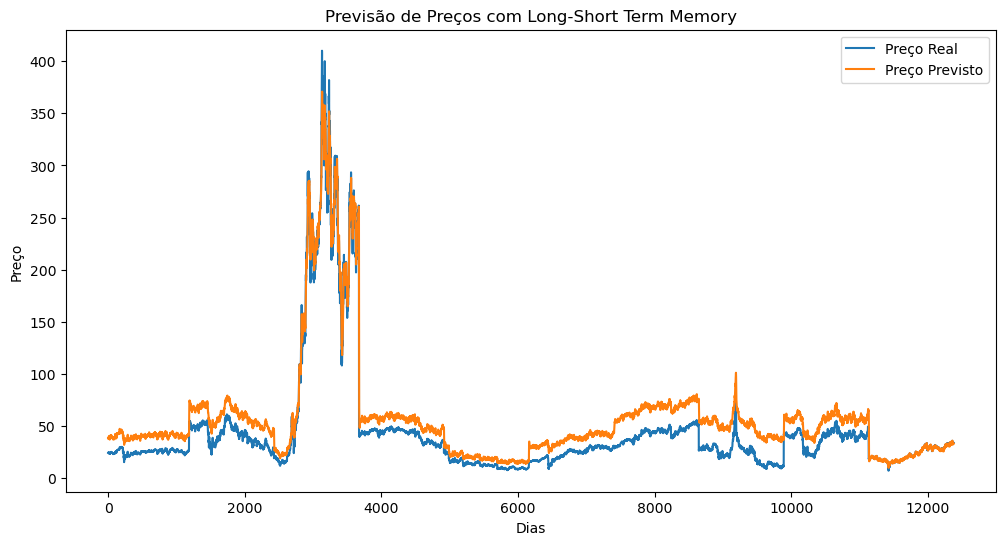

In [62]:
previsão = model.predict(X_teste)

#desnormalizando os preços
previsão = scaler_target.inverse_transform(previsão)
y_teste_atual = scaler_target.inverse_transform(y_teste)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_teste_atual, label='Preço Real')
plt.plot(previsão, label='Preço Previsto')
plt.title('Previsão de Preços com Long-Short Term Memory')
plt.xlabel('Dias')
plt.ylabel('Preço')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_teste, previsão)
rmse = np.sqrt(mean_squared_error(y_teste_atual, previsão))

print("Erro Absoluto Médio (MAE):", mae)
print("Erro Quadrático Médio (RMSE):", rmse)

Erro Absoluto Médio (MAE): 58.02982527563015
Erro Quadrático Médio (RMSE): 16.30988424988855
